In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from scipy.integrate import ode

In [2]:
def f(t, z, omega):
    #Right hand side of the differential equations
    #  dx/dt = y
    #  dy/dt = omega * x
    δ, α, β, γ, ω = omega                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return f

In [3]:
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri5' or "dopri5".
solver = ode(f)
solver.set_integrator('dopri5')

In [4]:
# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
#omega = 2 * np.pi
#solver.set_f_params(omega)

In [5]:
# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
w1=[]
gf1=[]
for i in range(0,200):
    
    γ = 1.0
    α = 1.0        
    δ = 0.1
    ω = i*0.01
    β = 0.04

    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].
    t1 = 40
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0

    k = 1

    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1

    x = sol[:,0]

    w1.append(ω)
    gf1.append(max(abs(x)))

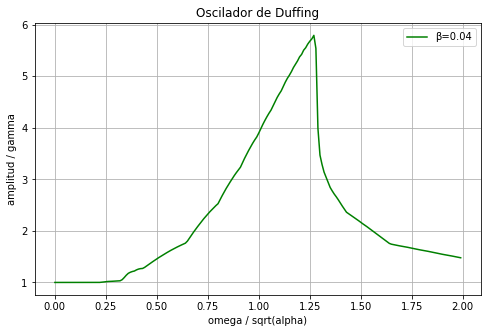

In [6]:
# Plot the solution...

plt.figure(figsize=(8, 5))

plt.plot(w1, gf1, label="β=0.04", color="green")
#plt.plot(w2, gf2, label="β=0.01", color="blue")
#plt.plot(w3, gf3, label="β=0.0", color="r")
#plt.plot(w4, gf4, label="β=-0.01", color="orange")
#plt.plot(w5, gf5, label="β=-0.04", color="black")
plt.xlabel('omega / sqrt(alpha)')
plt.ylabel("amplitud / gamma")
plt.title("Oscilador de Duffing")
plt.grid(True)
plt.legend()
plt.show()